In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
# Replace with your dataset path
df = pd.read_csv(r"C:\Users\AmlanC\OneDrive\Desktop\python\amlpy\CloudWatch_Traffic_Web_Attack.csv")

In [6]:
# df.info()
df.head()
# df.describe()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [7]:
print("Dataset shape:", df.shape)
print("Data types:\n", df.dtypes)
print("Missing values:\n", df.isnull().sum())
print("Unique values:\n", df.nunique())

Dataset shape: (282, 16)
Data types:
 bytes_in                int64
bytes_out               int64
creation_time          object
end_time               object
src_ip                 object
src_ip_country_code    object
protocol               object
response.code           int64
dst_port                int64
dst_ip                 object
rule_names             object
observation_name       object
source.meta            object
source.name            object
time                   object
detection_types        object
dtype: object
Missing values:
 bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64
Unique values:
 bytes_in              

In [21]:
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types,session_duration,avg_packet_size
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,30.986667
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,81.830000
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,69.956667
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,74.706667
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,34.030000


In [8]:
df['src_ip'].duplicated().values.any()

np.True_

In [14]:
# df['src_ip'].value_counts()
df.dtypes

bytes_in                             int64
bytes_out                            int64
creation_time          datetime64[ns, UTC]
end_time               datetime64[ns, UTC]
src_ip                              object
src_ip_country_code                 object
protocol                            object
response.code                        int64
dst_port                             int64
dst_ip                              object
rule_names                          object
observation_name                    object
source.meta                         object
source.name                         object
time                   datetime64[ns, UTC]
detection_types                     object
session_duration                   float64
byte_ratio                         float64
avg_packet_size                    float64
dtype: object

Feature Engineering

In [11]:
# Convert time columns to datetime
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['time'] = pd.to_datetime(df['time'])

In [13]:
# Calculate duration in seconds
df['session_duration'] = (df['end_time'] - df['creation_time']).dt.total_seconds()

df['byte_ratio'] = df['bytes_out'] / (df['bytes_in'] + 1)
# Average packet size
df['avg_packet_size'] = (df['bytes_in'] + df['bytes_out']) / df['session_duration']

In [15]:
df

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types,session_duration,byte_ratio,avg_packet_size
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,2.318401,30.986667
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,0.588296,81.830000
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,0.472445,69.956667
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,0.467411,74.706667
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,2.128390,34.030000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26 09:50:00+00:00,waf_rule,600.0,0.318843,90.860000
278,3638,3190,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26 09:50:00+00:00,waf_rule,600.0,0.876614,11.380000
279,25207794,1561220,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26 09:50:00+00:00,waf_rule,600.0,0.061934,44615.023333
280,5736,12114,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26 09:50:00+00:00,waf_rule,600.0,2.111557,29.750000


# 5. EXPLORATORY DATA ANALYSIS (EDA)

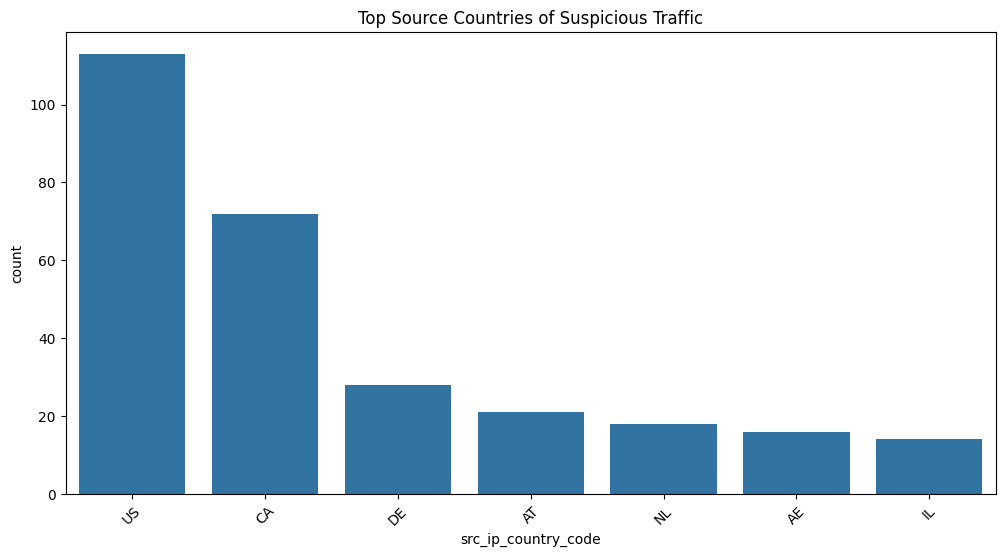

In [19]:
# Top source countries
df['src_ip_country_code'].value_counts().head(10).plot(kind='bar', title='Top Source Countries')

# Traffic by country
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='src_ip_country_code', order=df['src_ip_country_code'].value_counts().head(10).index)
plt.title('Top Source Countries of Suspicious Traffic')
plt.xticks(rotation=45)
plt.show()


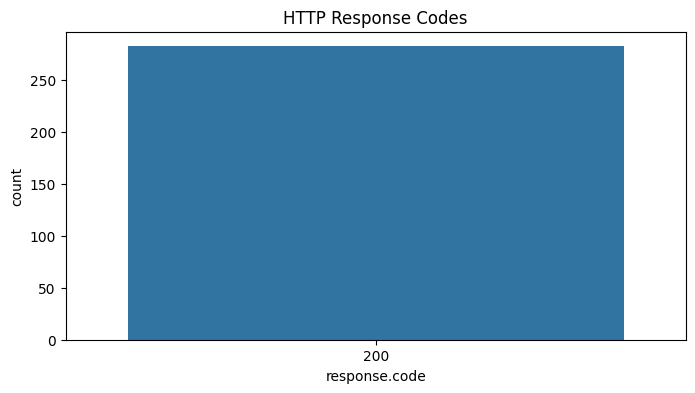

In [17]:
# Distribution of response codes
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='response.code')
plt.title("HTTP Response Codes")
plt.show()

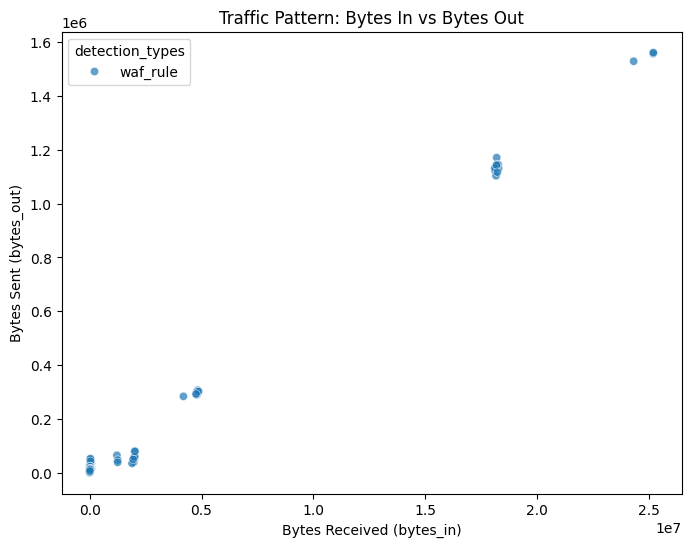

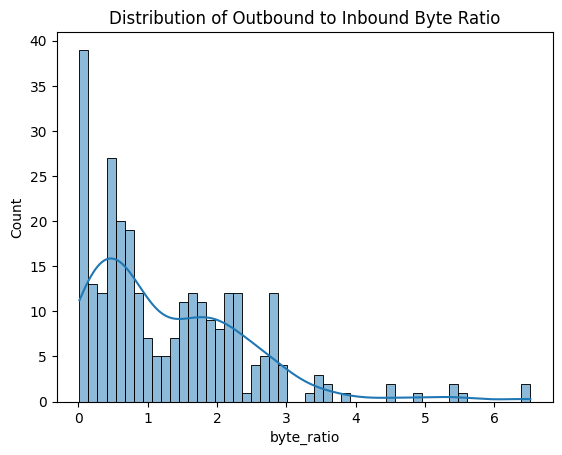

In [18]:
# Scatter plot of bytes_in vs bytes_out
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='bytes_in', y='bytes_out', hue='detection_types', alpha=0.7)
plt.title("Traffic Pattern: Bytes In vs Bytes Out")
plt.xlabel("Bytes Received (bytes_in)")
plt.ylabel("Bytes Sent (bytes_out)")
plt.show()

# Ratio: bytes_out / bytes_in (to detect potential exfiltration)
# df['byte_ratio'] = df['bytes_out'] / (df['bytes_in'] + 1)
sns.histplot(df['byte_ratio'], bins=50, kde=True)
plt.title("Distribution of Outbound to Inbound Byte Ratio")
plt.show()

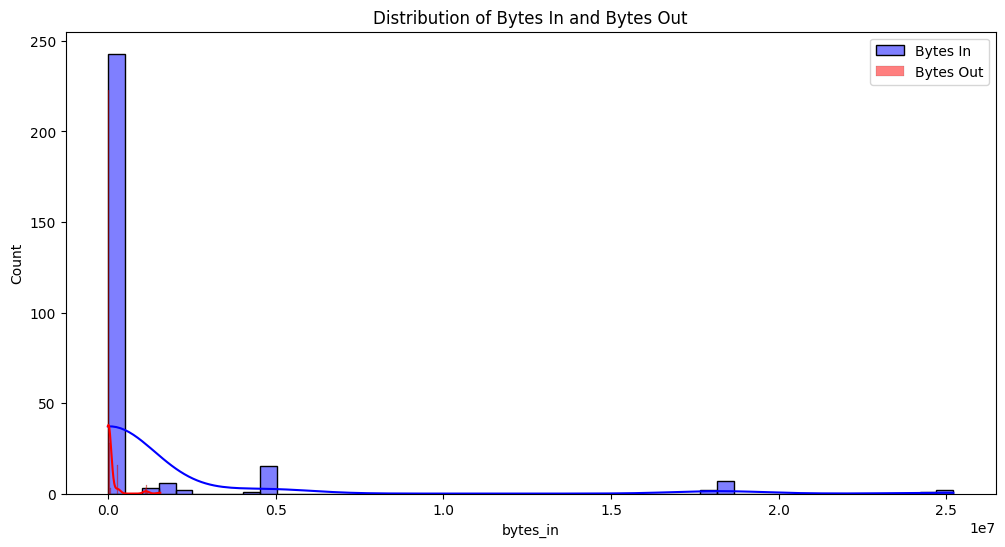

In [29]:
# Distribution of bytes in and bytes out
plt.figure(figsize=(12, 6))
sns.histplot(df['bytes_in'], bins=50, color='blue', kde=True, label='Bytes In')
sns.histplot(df['bytes_out'], bins=50, color='red', kde=True, label='Bytes Out')
plt.legend()
plt.title('Distribution of Bytes In and Bytes Out')
plt.show()

🕒 4. Temporal Pattern Analysis

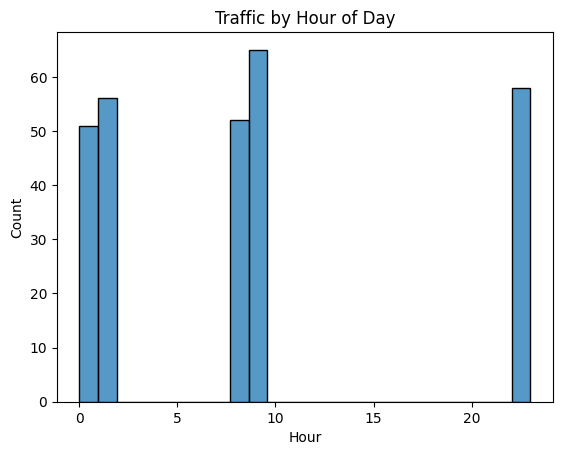

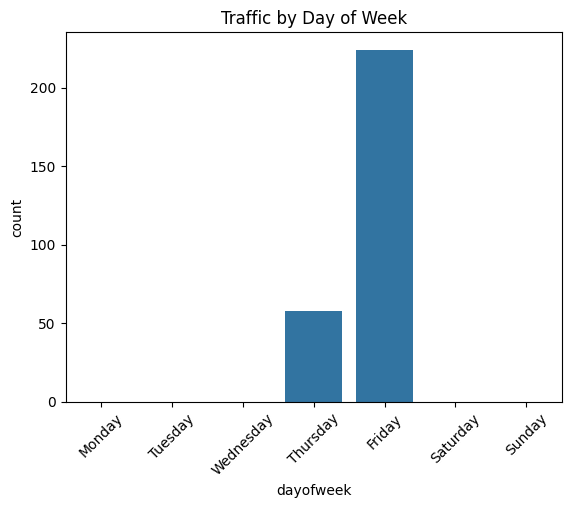

In [62]:
df['hour'] = df['time'].dt.hour
df['dayofweek'] = df['time'].dt.day_name()

# Hourly activity
sns.histplot(df['hour'], bins=24, kde=False)
plt.title("Traffic by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

# Weekly pattern
sns.countplot(data=df, x='dayofweek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Traffic by Day of Week")
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Top Observed Suspicious Behaviors'}, ylabel='observation_name'>

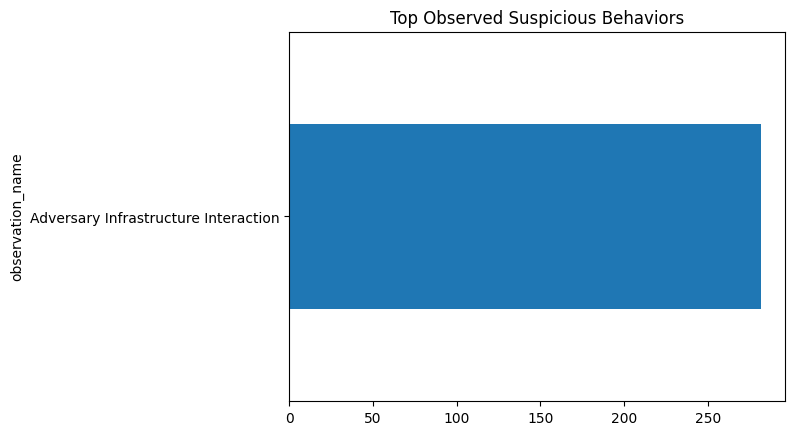

In [44]:
# Rule frequency
df['rule_names'].value_counts().head(10).plot(kind='barh', title="Most Triggered Detection Rules")

# Observations
df['observation_name'].value_counts().head(10).plot(kind='barh', title="Top Observed Suspicious Behaviors")

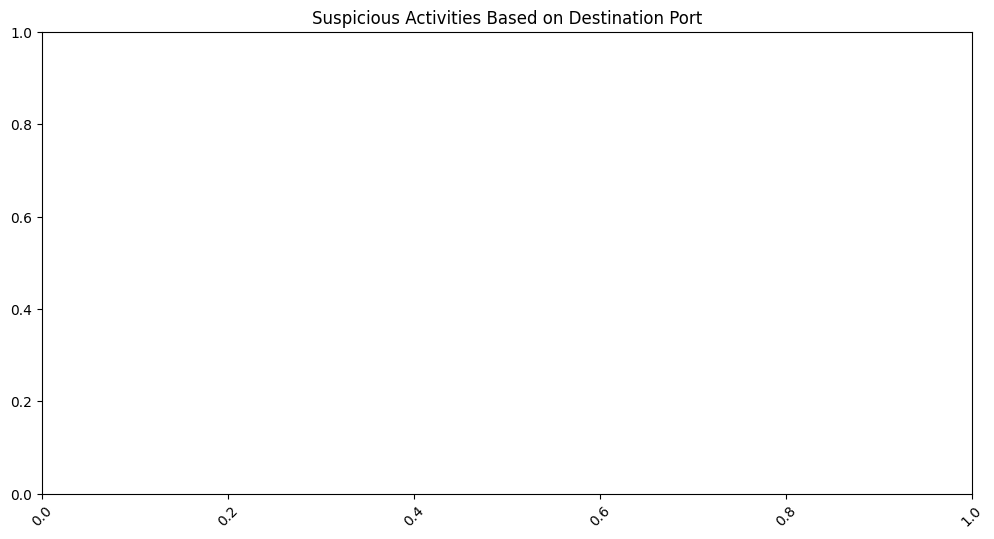

In [33]:
#Suspicious Activities Based on Ports
plt.figure(figsize=(12, 6))
sns.countplot(x='dst_port', data=df[df['detection_types'] =='Suspicious'], palette='coolwarm')
plt.title('Suspicious Activities Based on Destination Port')
plt.xticks(rotation=45)
plt.show()

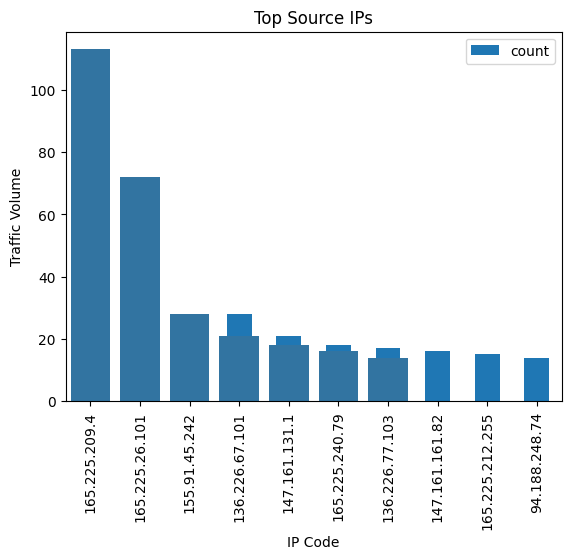

In [20]:
# Top 10 Source IPs
df['src_ip'].value_counts().head(10).plot(kind='bar', title="Top 10 Source IPs")

# Source country activity
country_counts = df['src_ip_country_code'].value_counts().head(10)
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title("Top Source IPs")
plt.xlabel("IP Code")
plt.ylabel("Traffic Volume")
plt.show()

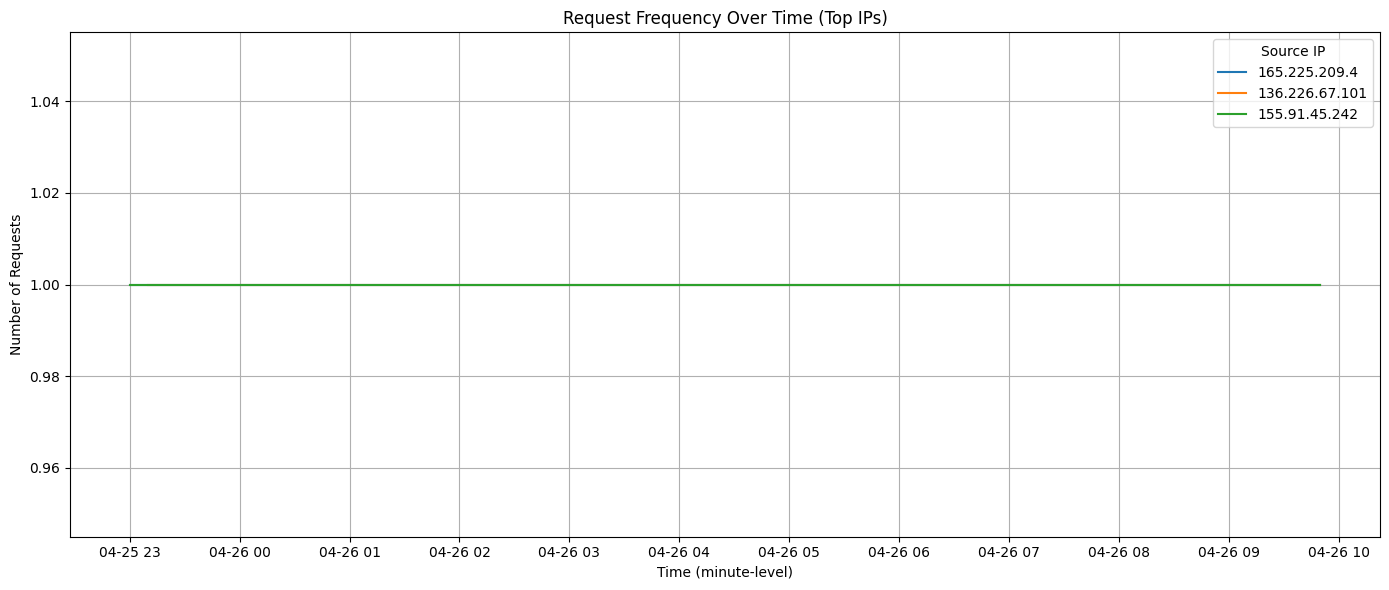

In [46]:
# Convert 'time' to datetime if not already
# df['time'] = pd.to_datetime(df['time'])

# Set time index and group by IP and minute
df['minute'] = df['time'].dt.floor('min')
ip_minute_freq = df.groupby(['src_ip', 'minute']).size().reset_index(name='request_count')

# Plot request frequency for top suspicious IPs
top_ips = ip_minute_freq['src_ip'].value_counts().head(3).index

plt.figure(figsize=(14,6))
for ip in top_ips:
    subset = ip_minute_freq[ip_minute_freq['src_ip'] == ip]
    plt.plot(subset['minute'], subset['request_count'], label=ip)

plt.title("Request Frequency Over Time (Top IPs)")
plt.xlabel("Time (minute-level)")
plt.ylabel("Number of Requests")
plt.legend(title="Source IP")
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
import math

def shannon_entropy(s):
    """Calculate Shannon entropy of a string"""
    if not s:
        return 0
    prob = [float(s.count(c)) / len(s) for c in set(s)]
    entropy = -sum([p * math.log2(p) for p in prob])
    return entropy


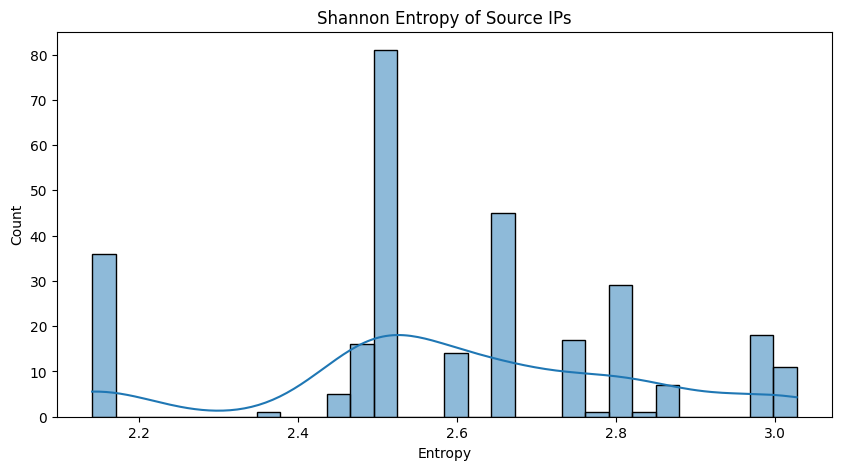

,src_ip,ip_entropy
238,136.226.80.97,3.026987
57,136.226.80.97,3.026987
216,136.226.80.97,3.026987
38,136.226.80.97,3.026987
30,136.226.80.97,3.026987
188,136.226.80.97,3.026987
203,136.226.80.97,3.026987
171,136.226.80.97,3.026987
164,136.226.80.97,3.026987
156,136.226.80.97,3.026987


In [48]:
# Apply to source IPs (less common for entropy but demo-worthy)
df['ip_entropy'] = df['src_ip'].apply(shannon_entropy)

# OPTIONAL: if you have URLs or payloads, apply there
# df['url_entropy'] = df['url'].apply(shannon_entropy)

# Visualize
plt.figure(figsize=(10,5))
sns.histplot(df['ip_entropy'], bins=30, kde=True)
plt.title("Shannon Entropy of Source IPs")
plt.xlabel("Entropy")
plt.ylabel("Count")
plt.show()

# Top high-entropy IPs (possible obfuscation)
df[['src_ip', 'ip_entropy']].sort_values(by='ip_entropy', ascending=False).head(10)

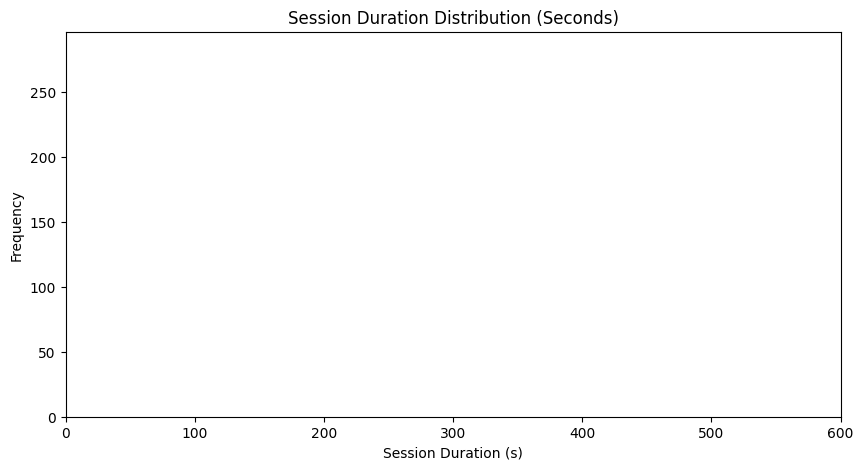

Short session threshold: < 600.00 seconds
Long session threshold: > 600.00 seconds


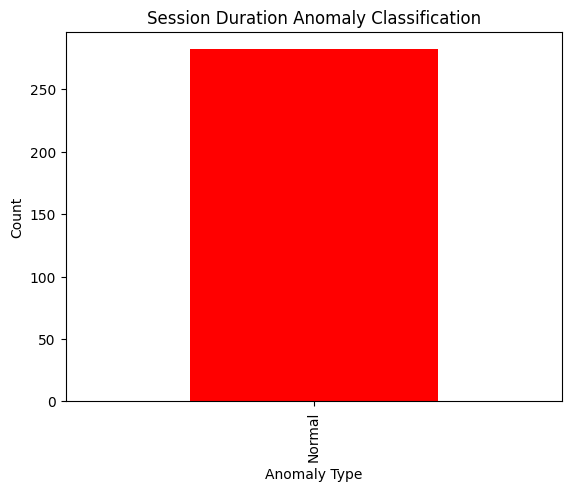

,src_ip,session_duration,detection_types,dst_port


In [52]:
# Check distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['session_duration'], bins=100, kde=True)
plt.title("Session Duration Distribution (Seconds)")
plt.xlabel("Session Duration (s)")
plt.ylabel("Frequency")
plt.xlim(0, df['session_duration'].quantile(0.99))  # Clip outliers
plt.show()

# Identify short and long session thresholds (e.g., 1st and 99th percentiles)
short_threshold = df['session_duration'].quantile(0.01)
long_threshold = df['session_duration'].quantile(0.99)

print(f"Short session threshold: < {short_threshold:.2f} seconds")
print(f"Long session threshold: > {long_threshold:.2f} seconds")

# Flag anomalies
df['duration_anomaly'] = df['session_duration'].apply(
    lambda x: 'Short' if x < short_threshold else ('Long' if x > long_threshold else 'Normal')
)

# Summary count
df['duration_anomaly'].value_counts().plot(kind='bar', color=['red', 'green', 'gray'])
plt.title("Session Duration Anomaly Classification")
plt.xlabel("Anomaly Type")
plt.ylabel("Count")
plt.show()

# Inspect a few records
df[df['duration_anomaly'] != 'Normal'][['src_ip', 'session_duration', 'detection_types', 'dst_port']].head(10)

In [21]:
df.describe()

,bytes_in,bytes_out,response.code,dst_port,session_duration,byte_ratio,avg_packet_size
count,2.820000e+02,2.820000e+02,282.0,282.0,282.0,282.000000,282.000000
mean,1.199390e+06,8.455429e+04,200.0,443.0,600.0,1.305889,2139.907470
std,4.149312e+06,2.549279e+05,0.0,0.0,0.0,1.169405,7339.481086
min,4.000000e+01,4.400000e+01,200.0,443.0,600.0,0.018153,0.206667
25%,5.381500e+03,1.114200e+04,200.0,443.0,600.0,0.472628,26.791667
50%,1.318200e+04,1.379950e+04,200.0,443.0,600.0,0.893332,54.803333
75%,3.083300e+04,2.627950e+04,200.0,443.0,600.0,1.989029,95.129167
max,2.520779e+07,1.561220e+06,200.0,443.0,600.0,6.518519,44615.023333


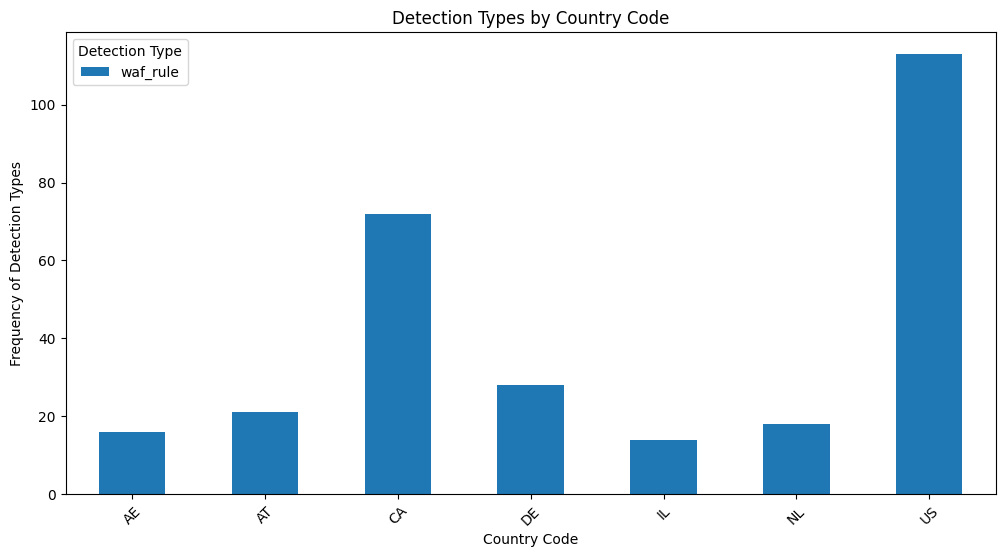

In [80]:
# Stacked Bar Chart for Detection Types by Country
# Preparing data for stacked bar chart
detection_types_by_country = pd.crosstab(transformed_df['src_ip_country_code'],transformed_df['detection_types'])
detection_types_by_country.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Detection Types by Country Code')
plt.xlabel('Country Code')
plt.ylabel('Frequency of Detection Types')
plt.xticks(rotation=45)
plt.legend(title='Detection Type')
plt.show()

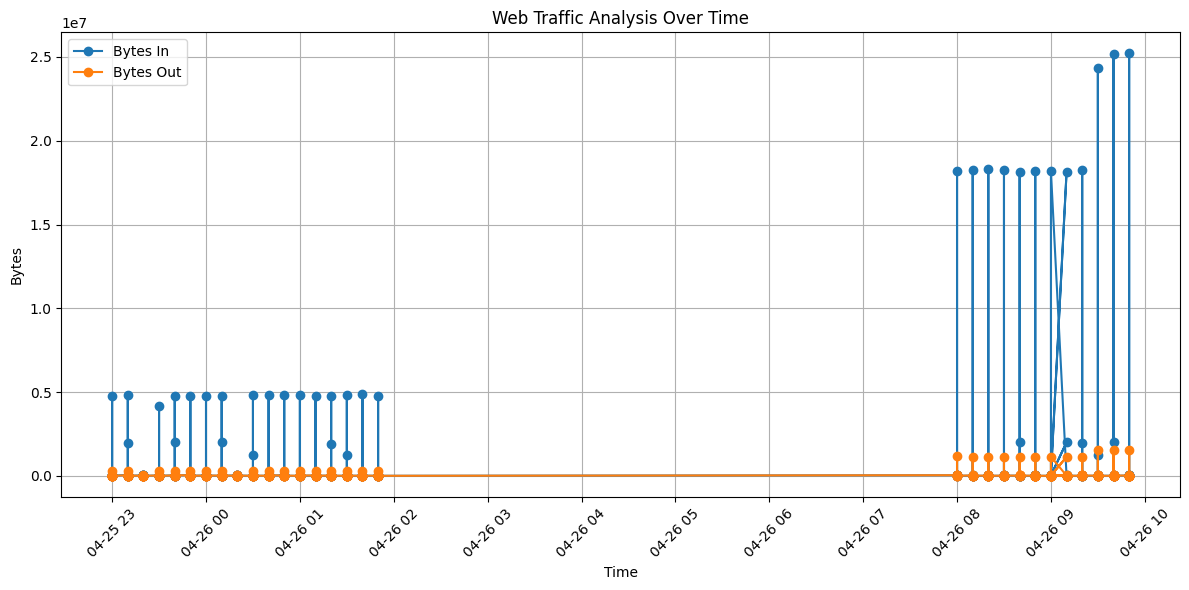

In [22]:
# Set 'creation_time' as the index
df.set_index('creation_time', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['bytes_in'], label='Bytes In', marker='o')
plt.plot(df.index, df['bytes_out'], label='Bytes Out',marker='o')
plt.title('Web Traffic Analysis Over Time')
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
# Show the plot
plt.show()

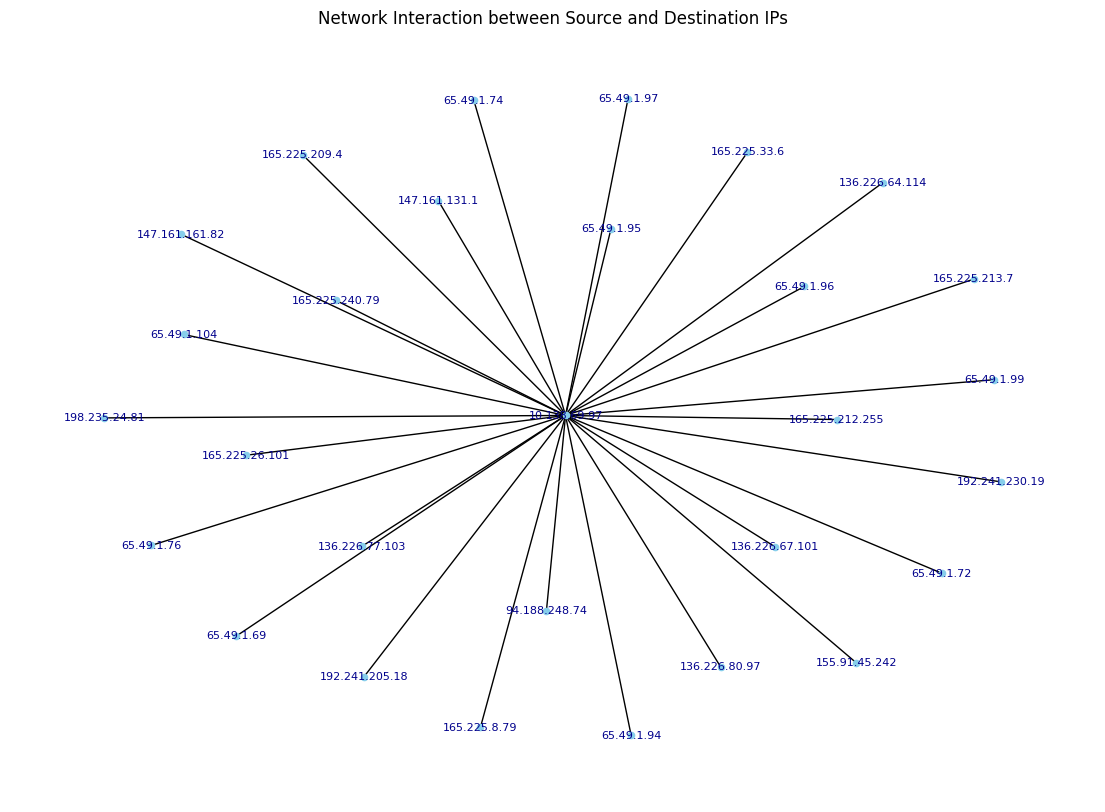

In [88]:
# Create a graph
G = nx.Graph()
# Add edges from source IP to destination IP
for idx, row in df.iterrows():
    G.add_edge(row['src_ip'], row['dst_ip'])
# Draw the network graph
plt.figure(figsize=(14, 10))
nx.draw_networkx(G, with_labels=True, node_size=20,font_size=8, node_color='skyblue', font_color='darkblue')
plt.title('Network Interaction between Source and Destination IPs')
plt.axis('off') # Turn off the axis
# Show the plot
plt.show()

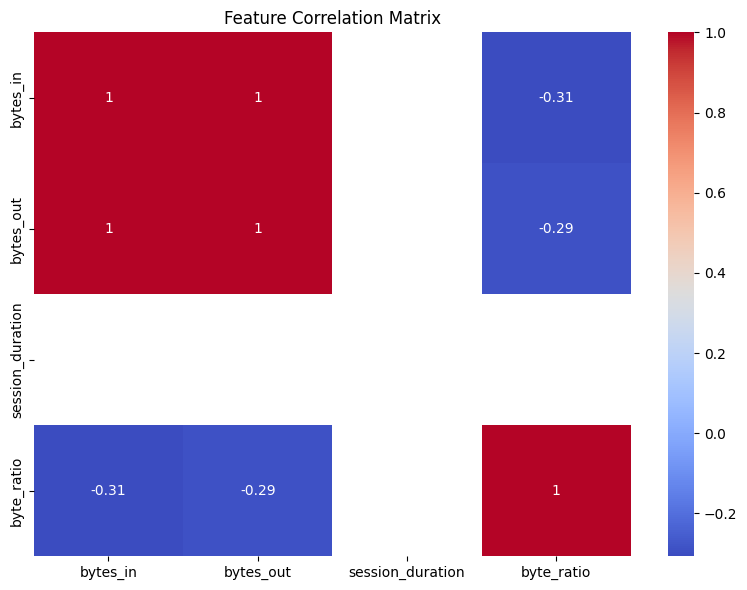

In [27]:
# 4. # Plot the correlation heatmap between the selected features

corr_features = df[['bytes_in', 'bytes_out', 'session_duration', 'byte_ratio']]
plt.figure(figsize=(8, 6))
sns.heatmap(corr_features.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

Predictive Modeling

In [28]:
# Anomaly Detection with Isolation forest

from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assume binary label: suspicious (1), normal (0)
df['is_suspicious'] = df['rule_names'].notnull().astype(int)

features = ['bytes_in', 'bytes_out', 'session_duration', 'byte_ratio']
X = df[features]
y = df['is_suspicious']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Isolation Forest for Anomaly Detection
iso = IsolationForest(contamination=0.05)
df['anomaly_score'] = iso.fit_predict(X)


In [31]:
# Run Isolation Forest
# features = ['bytes_in', 'bytes_out', 'session_duration', 'byte_ratio']
# iso = IsolationForest(contamination=0.05, random_state=42)
# df['anomaly_score'] = iso.fit_predict(df[features])
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)


In [ ]:
df['is_anomaly'].value_counts()


In [33]:
# Filter anomalies
anomalies = df[df['is_anomaly'] == 1]
print(anomalies)

                           bytes_in  bytes_out                  end_time  \
creation_time                                                              
2024-04-25 23:20:00+00:00        80        528 2024-04-25 23:30:00+00:00   
2024-04-25 23:30:00+00:00   4190330     283456 2024-04-25 23:40:00+00:00   
2024-04-26 01:00:00+00:00   4827283     306181 2024-04-26 01:10:00+00:00   
2024-04-26 08:00:00+00:00  18201558    1170896 2024-04-26 08:10:00+00:00   
2024-04-26 08:10:00+00:00  18273120    1145109 2024-04-26 08:20:00+00:00   
2024-04-26 08:20:00+00:00  18285525    1130944 2024-04-26 08:30:00+00:00   
2024-04-26 08:40:00+00:00  18125238    1121958 2024-04-26 08:50:00+00:00   
2024-04-26 08:50:00+00:00  18171403    1103358 2024-04-26 09:00:00+00:00   
2024-04-26 09:10:00+00:00  18119202    1132321 2024-04-26 09:20:00+00:00   
2024-04-26 09:00:00+00:00  18187778    1142605 2024-04-26 09:10:00+00:00   
2024-04-26 09:20:00+00:00  18231909    1116695 2024-04-26 09:30:00+00:00   
2024-04-26 0

In [87]:
df

,bytes_in,bytes_out,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,...,time,detection_types,session_duration,byte_ratio,avg_packet_size,is_suspicious,anomaly_score,is_anomaly,hour,dayofweek
creation_time,,,,,,,,,,,,,,,,,,,,,
2024-04-25 23:00:00+00:00,5602,12990,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,...,2024-04-25 23:00:00+00:00,waf_rule,600.0,2.318401,30.986667,1,1,0,23,Thursday
2024-04-25 23:00:00+00:00,30912,18186,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,...,2024-04-25 23:00:00+00:00,waf_rule,600.0,0.588296,81.830000,1,1,0,23,Thursday
2024-04-25 23:00:00+00:00,28506,13468,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,...,2024-04-25 23:00:00+00:00,waf_rule,600.0,0.472445,69.956667,1,1,0,23,Thursday
2024-04-25 23:00:00+00:00,30546,14278,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,...,2024-04-25 23:00:00+00:00,waf_rule,600.0,0.467411,74.706667,1,1,0,23,Thursday
2024-04-25 23:00:00+00:00,6526,13892,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,...,2024-04-25 23:00:00+00:00,waf_rule,600.0,2.128390,34.030000,1,1,0,23,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26 09:50:00+00:00,41336,13180,2024-04-26 10:00:00+00:00,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,...,2024-04-26 09:50:00+00:00,waf_rule,600.0,0.318843,90.860000,1,1,0,9,Friday
2024-04-26 09:50:00+00:00,3638,3190,2024-04-26 10:00:00+00:00,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,...,2024-04-26 09:50:00+00:00,waf_rule,600.0,0.876614,11.380000,1,1,0,9,Friday
2024-04-26 09:50:00+00:00,25207794,1561220,2024-04-26 10:00:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,...,2024-04-26 09:50:00+00:00,waf_rule,600.0,0.061934,44615.023333,1,-1,1,9,Friday


In [88]:
# Select features for modeling
features = ['bytes_in', 'bytes_out', 'session_duration', 'byte_ratio']
X = df[features]

# Use Isolation Forest to label anomalies
iso = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_score'] = iso.fit_predict(X)
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)
y = df['is_anomaly']

In [89]:
Y = df['is_anomaly']
print("Y values (is_anomaly labels):")
print(Y.value_counts())
print(Y)

Y values (is_anomaly labels):
is_anomaly
0    267
1     15
Name: count, dtype: int64
creation_time
2024-04-25 23:00:00+00:00    0
2024-04-25 23:00:00+00:00    0
2024-04-25 23:00:00+00:00    0
2024-04-25 23:00:00+00:00    0
2024-04-25 23:00:00+00:00    0
                            ..
2024-04-26 09:50:00+00:00    0
2024-04-26 09:50:00+00:00    0
2024-04-26 09:50:00+00:00    1
2024-04-26 09:50:00+00:00    0
2024-04-26 09:50:00+00:00    0
Name: is_anomaly, Length: 282, dtype: int64



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.67      0.67      0.67         3

    accuracy                           0.96        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.96      0.96      0.96        57


=== Confusion Matrix ===
[[53  1]
 [ 1  2]]


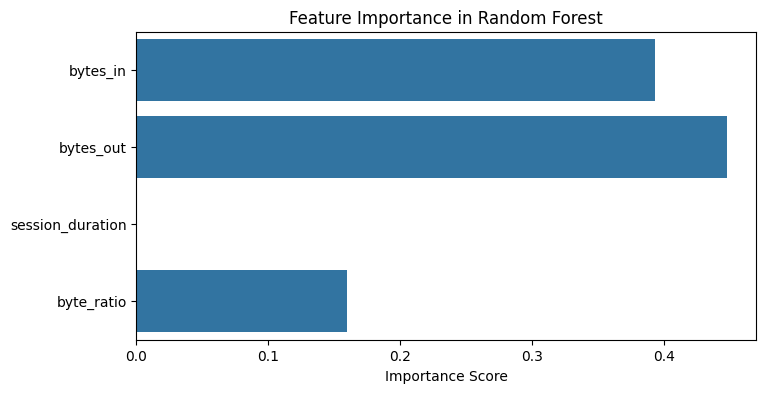

In [90]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Predict
y_pred = rfc.predict(X_test)

# Evaluate
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# Optional: Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

importances = rfc.feature_importances_
feat_names = features
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.show()


In [91]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model Accuracy: ", accuracy)

Model Accuracy:  0.9649122807017544


In [92]:
print("Classification Report: ",classification)

Classification Report:                precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.67      0.67      0.67         3

    accuracy                           0.96        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.96      0.96      0.96        57



In [93]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8240740740740741


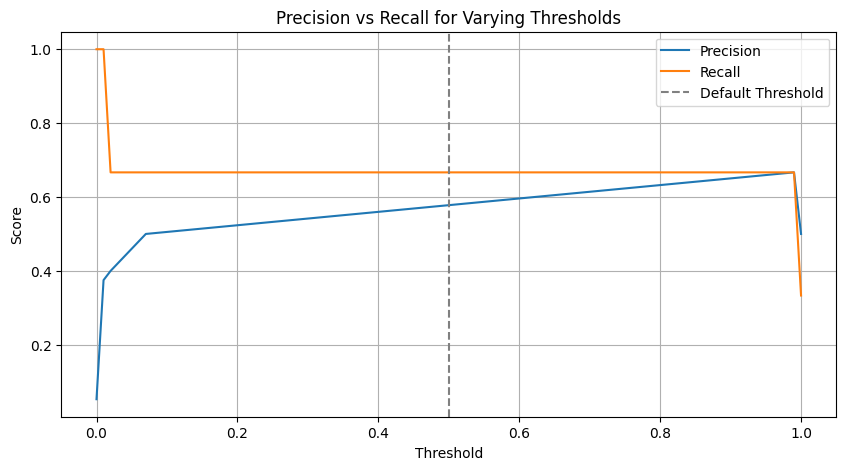


=== Evaluation at Threshold: 0.35 ===
[[53  1]
 [ 1  2]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.67      0.67      0.67         3

    accuracy                           0.96        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.96      0.96      0.96        57

ROC-AUC Score: 0.9660493827160495


In [94]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities
y_proba = rfc.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (anomaly)

# Plot precision-recall vs threshold
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(10, 5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.axvline(0.5, color='gray', linestyle='--', label='Default Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs Recall for Varying Thresholds')
plt.legend()
plt.grid(True)
plt.show()

# Choose a new threshold
custom_threshold = 0.35
y_pred_custom = (y_proba >= custom_threshold).astype(int)

# Evaluate at new threshold
print(f"\n=== Evaluation at Threshold: {custom_threshold} ===")
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


=== Confusion Matrix ===
[[53  1]
 [ 2  1]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.50      0.33      0.40         3

    accuracy                           0.95        57
   macro avg       0.73      0.66      0.69        57
weighted avg       0.94      0.95      0.94        57

ROC-AUC Score: 0.7932098765432098


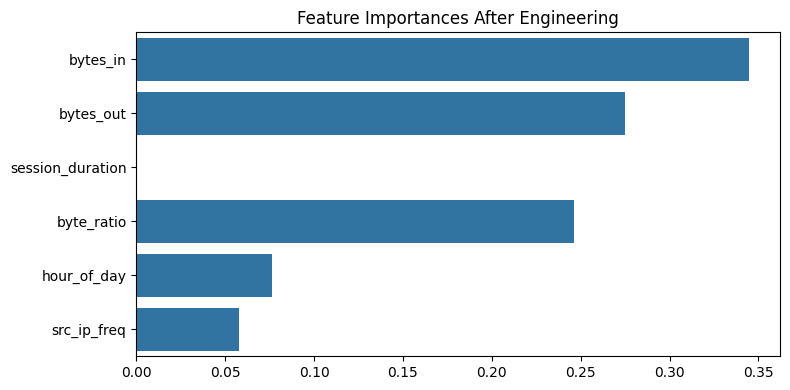

In [95]:
# New Feature 1: Time of Day
df['hour_of_day'] = df['time'].dt.hour

# New Feature 2: IP Frequency
df['src_ip_freq'] = df['src_ip'].map(df['src_ip'].value_counts())

# Final features list
features = ['bytes_in', 'bytes_out', 'session_duration', 'byte_ratio', 'hour_of_day', 'src_ip_freq']
X = df[features]

# Label anomalies using Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_score'] = iso.fit_predict(X)
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)
y = df['is_anomaly']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rfc.fit(X_train, y_train)

# Predict probabilities & classes
y_proba = rfc.predict_proba(X_test)[:, 1]
threshold = 0.35
y_pred = (y_proba >= threshold).astype(int)

# Evaluation
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Optional: Feature importance plot
import matplotlib.pyplot as plt
import seaborn as sns

importances = rfc.feature_importances_
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances After Engineering")
plt.tight_layout()
plt.show()


=== Confusion Matrix ===
[[53  1]
 [ 2  1]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.50      0.33      0.40         3

    accuracy                           0.95        57
   macro avg       0.73      0.66      0.69        57
weighted avg       0.94      0.95      0.94        57

ROC-AUC Score: 0.9506172839506173


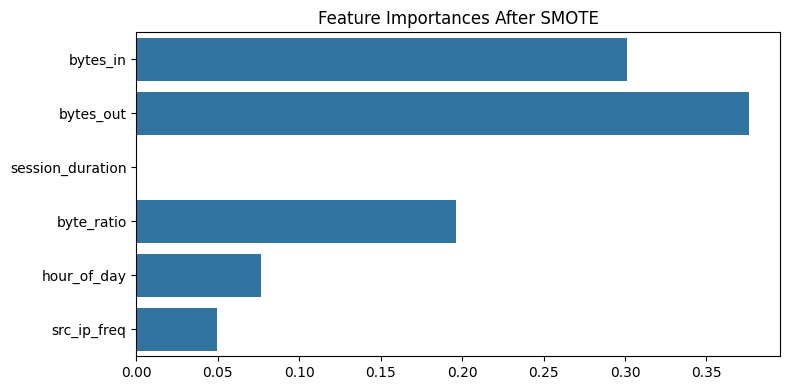

In [98]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Final features
features = ['bytes_in', 'bytes_out', 'session_duration', 'byte_ratio', 'hour_of_day', 'src_ip_freq']
X = df[features]

# Use Isolation Forest to label anomalies (unsupervised labels)
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_score'] = iso.fit_predict(X)
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)
y = df['is_anomaly']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_res, y_train_res)

# Predict
y_pred = rfc.predict(X_test)
y_proba = rfc.predict_proba(X_test)[:, 1]

# Evaluation
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Feature Importance
importances = rfc.feature_importances_
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances After SMOTE")
plt.tight_layout()
plt.show()


In [99]:
print("Model Accuracy: ",accuracy)

Model Accuracy:  0.9649122807017544


XGBoost: xgboost_anomaly_classifier

=== Confusion Matrix ===
[[53  1]
 [ 2  1]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.50      0.33      0.40         3

    accuracy                           0.95        57
   macro avg       0.73      0.66      0.69        57
weighted avg       0.94      0.95      0.94        57

ROC-AUC Score: 0.691358024691358


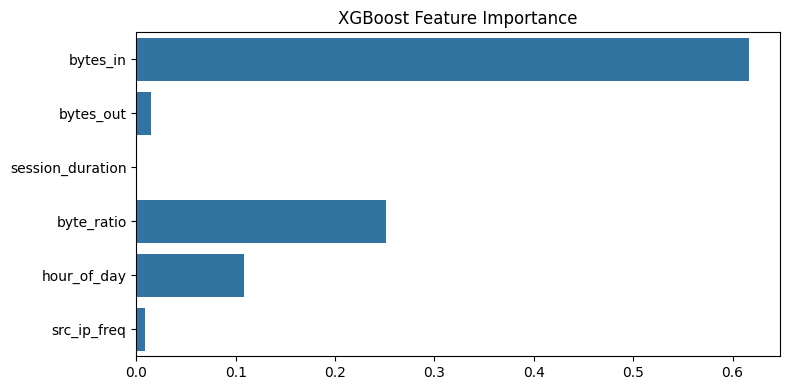

In [100]:
from xgboost import XGBClassifier

# Feature Set
features = ['bytes_in', 'bytes_out', 'session_duration', 'byte_ratio', 'hour_of_day', 'src_ip_freq']
X = df[features]

# Label with Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_score'] = iso.fit_predict(X)
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)
y = df['is_anomaly']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Calculate scale_pos_weight
n_pos = sum(y_train == 1)
n_neg = sum(y_train == 0)
scale_pos_weight = n_neg / n_pos

# XGBoost Classifier
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)

# Predictions
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

# Evaluation
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Feature Importance
importances = xgb.feature_importances_
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=features)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()


Feature Scaling

In [61]:
df.columns

Index(['bytes_in', 'bytes_out', 'end_time', 'src_ip', 'src_ip_country_code',
       'protocol', 'response.code', 'dst_port', 'dst_ip', 'rule_names',
       'observation_name', 'source.meta', 'source.name', 'time',
       'detection_types', 'session_duration', 'byte_ratio', 'avg_packet_size',
       'is_suspicious', 'anomaly_score', 'is_anomaly'],
      dtype='object')

In [64]:
df_unique = df.drop_duplicates()
print(df_unique.head())

                           bytes_in  bytes_out                  end_time  \
creation_time                                                              
2024-04-25 23:00:00+00:00      5602      12990 2024-04-25 23:10:00+00:00   
2024-04-25 23:00:00+00:00     30912      18186 2024-04-25 23:10:00+00:00   
2024-04-25 23:00:00+00:00     28506      13468 2024-04-25 23:10:00+00:00   
2024-04-25 23:00:00+00:00     30546      14278 2024-04-25 23:10:00+00:00   
2024-04-25 23:00:00+00:00      6526      13892 2024-04-25 23:10:00+00:00   

                                    src_ip src_ip_country_code protocol  \
creation_time                                                             
2024-04-25 23:00:00+00:00   147.161.161.82                  AE    HTTPS   
2024-04-25 23:00:00+00:00     165.225.33.6                  US    HTTPS   
2024-04-25 23:00:00+00:00  165.225.212.255                  CA    HTTPS   
2024-04-25 23:00:00+00:00   136.226.64.114                  US    HTTPS   
2024-04-25 23:00:

In [66]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [67]:
import networkx as nx
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Convert time-related columns to datetime format
df_unique['creation_time'] = pd.to_datetime(df_unique['creation_time'])
df_unique['end_time'] = pd.to_datetime(df_unique['end_time'])
df_unique['time'] = pd.to_datetime(df_unique['time'])

In [65]:
# Standardize text data (example: convert to lower case)
df_unique['src_ip_country_code'] = df_unique['src_ip_country_code'].str.upper() # Ensuring country codes are all upper case
# Display changes and current state of the DataFrame
print("Unique Datasets Information:")
df_unique.info()

Unique Datasets Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 282 entries, 2024-04-25 23:00:00+00:00 to 2024-04-26 09:50:00+00:00
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   bytes_in             282 non-null    int64              
 1   bytes_out            282 non-null    int64              
 2   end_time             282 non-null    datetime64[ns, UTC]
 3   src_ip               282 non-null    object             
 4   src_ip_country_code  282 non-null    object             
 5   protocol             282 non-null    object             
 6   response.code        282 non-null    int64              
 7   dst_port             282 non-null    int64              
 8   dst_ip               282 non-null    object             
 9   rule_names           282 non-null    object             
 10  observation_name     282 non-null    object             
 11  source

In [69]:
# Preparing column transformations
# StandardScaler for numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_unique[['bytes_in','bytes_out', 'session_duration']])

In [71]:
# OneHotEncoder for categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df_unique[['src_ip_country_code']])

# Combining transformed features back into the DataFrame
scaled_columns = ['scaled_bytes_in', 'scaled_bytes_out', 'scaled_session_duration']
encoded_columns = encoder.get_feature_names_out(['src_ip_country_code'])

In [73]:
# Convert encoded_features to dense array before creating DataFrame to avoid shape mismatch
encoded_features_dense = encoded_features.toarray()


In [74]:
# Convert numpy arrays back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=scaled_columns, index=df.index)
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoded_columns, index=df.index)

In [75]:
# Concatenate all the data back together
transformed_df = pd.concat([df_unique, scaled_df, encoded_df], axis=1)

# Displaying the transformed data
transformed_df.head()

,bytes_in,bytes_out,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,...,scaled_bytes_in,scaled_bytes_out,scaled_session_duration,src_ip_country_code_AE,src_ip_country_code_AT,src_ip_country_code_CA,src_ip_country_code_DE,src_ip_country_code_IL,src_ip_country_code_NL,src_ip_country_code_US
creation_time,,,,,,,,,,,,,,,,,,,,,
2024-04-25 23:00:00+00:00,5602,12990,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,...,-0.288219,-0.281223,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-04-25 23:00:00+00:00,30912,18186,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,...,-0.282108,-0.260804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-04-25 23:00:00+00:00,28506,13468,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,...,-0.282689,-0.279344,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2024-04-25 23:00:00+00:00,30546,14278,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,...,-0.282197,-0.276161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-04-25 23:00:00+00:00,6526,13892,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,...,-0.287996,-0.277678,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
# Compute correlation matrix for numeric columns only
numeric_df = transformed_df.select_dtypes(include=['float64','int64'])
correlation_matrix_numeric = numeric_df.corr()
# Display the correlation matrix
correlation_matrix_numeric

,bytes_in,bytes_out,response.code,dst_port,session_duration,byte_ratio,avg_packet_size,is_suspicious,anomaly_score,is_anomaly,scaled_bytes_in,scaled_bytes_out,scaled_session_duration,src_ip_country_code_AE,src_ip_country_code_AT,src_ip_country_code_CA,src_ip_country_code_DE,src_ip_country_code_IL,src_ip_country_code_NL,src_ip_country_code_US
bytes_in,1.000000,0.997705,NaN,NaN,NaN,-0.306455,0.999992,NaN,-0.806324,0.806324,1.000000,0.997705,NaN,-0.070559,-0.081670,-0.166488,-0.095333,-0.065939,-0.006827,0.316015
bytes_out,0.997705,1.000000,NaN,NaN,NaN,-0.290436,0.997963,NaN,-0.809330,0.809330,0.997705,1.000000,NaN,-0.072452,-0.081777,-0.159587,-0.090001,-0.067630,-0.045641,0.327683
response.code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dst_port,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
session_duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
byte_ratio,-0.306455,-0.290436,NaN,NaN,NaN,1.000000,-0.305566,NaN,0.078716,-0.078716,-0.306455,-0.290436,NaN,0.057884,0.128565,-0.143344,0.066068,0.149898,-0.092702,-0.029173
avg_packet_size,0.999992,0.997963,NaN,NaN,NaN,-0.305566,1.000000,NaN,-0.806599,0.806599,0.999992,0.997963,NaN,-0.070677,-0.081687,-0.166109,-0.095036,-0.066045,-0.009075,0.316730
is_suspicious,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anomaly_score,-0.806324,-0.809330,NaN,NaN,NaN,0.078716,-0.806599,NaN,1.000000,-1.000000,-0.806324,-0.809330,NaN,0.058131,0.067233,0.138786,0.078696,0.054173,0.061891,-0.289864
is_anomaly,0.806324,0.809330,NaN,NaN,NaN,-0.078716,0.806599,NaN,-1.000000,1.000000,0.806324,0.809330,NaN,-0.058131,-0.067233,-0.138786,-0.078696,-0.054173,-0.061891,0.289864


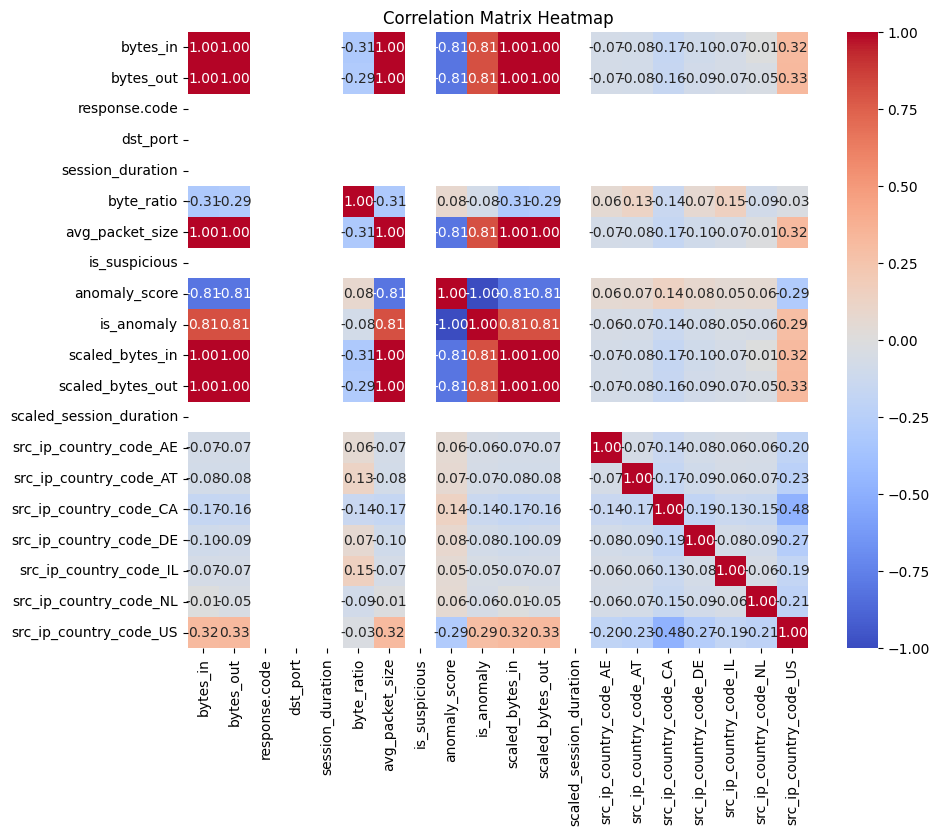

In [77]:
# Heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

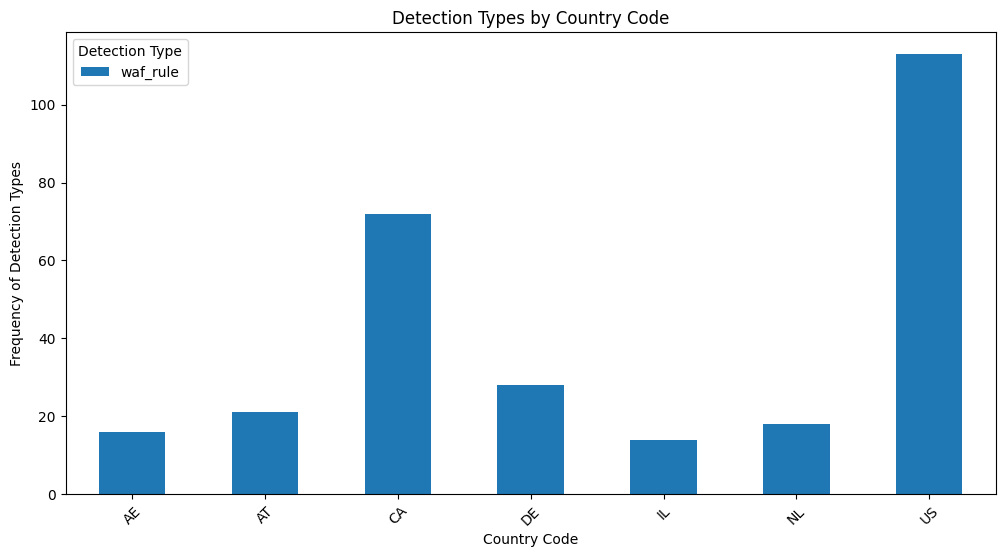

In [79]:
# Stacked Bar Chart for Detection Types by Country
# Preparing data for stacked bar chart
detection_types_by_country = pd.crosstab(transformed_df['src_ip_country_code'], transformed_df['detection_types'])
detection_types_by_country.plot(kind='bar', stacked=True,figsize=(12, 6))
plt.title('Detection Types by Country Code')
plt.xlabel('Country Code')
plt.ylabel('Frequency of Detection Types')
plt.xticks(rotation=45)
plt.legend(title='Detection Type')
plt.show()


In [80]:
# Convert 'creation_time' to datetime format
df_unique['creation_time'] = pd.to_datetime(df_unique['creation_time'])
# Set 'creation_time' as the index
df_unique.set_index('creation_time', inplace=True)
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['bytes_in'], label='Bytes In',marker='o')
plt.plot(data.index, data['bytes_out'], label='Bytes Out', marker='o')
plt.title('Web Traffic Analysis Over Time')
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
# Show the plot
plt.show()

NameError: name 'data' is not defined

In [82]:
# RandomForestClassifier
# First, encode this column into binary labels
transformed_df['is_suspicious'] = (transformed_df['detection_types'] == 'waf_rule').astype(int)
# Features and Labels
X = transformed_df[['bytes_in', 'bytes_out','scaled_session_duration']] # Numeric features
y = transformed_df['is_suspicious'] # Binary labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)

In [83]:
print("Model Accuracy: ",accuracy)

Model Accuracy:  1.0


In [84]:
print("Classification Report: ",classification)

Classification Report:                precision    recall  f1-score   support

           1       1.00      1.00      1.00        85

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



Neural Network

In [85]:
df['is_suspicious'] = (df['detection_types'] == 'waf_rule').astype(int)
# Features and labels
X = df[['bytes_in', 'bytes_out']].values # Using only numeric features
y = df['is_suspicious'].values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural network model
model = Sequential([
Dense(8, activation='relu',
input_shape=(X_train_scaled.shape[1],)),
Dense(16, activation='relu'),
Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10,
batch_size=8, verbose=1)
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0316 - loss: 0.7687  
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9530 - loss: 0.6747
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9847 - loss: 0.6104
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.5507
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.4745
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.3832
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.2890
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.2074
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1427
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1019
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0833 
Test Accuracy: 100.00%


In [101]:
# 7. Evaluation
# Evaluate the anomaly detection model by checking its accuracy in identifying suspicious activities.
# Check the proportion of anomalies detected
print(df['anomaly'].value_counts())
# Display anomaly samples
suspicious_activities = df[df['anomaly'] == 'Suspicious']
print(suspicious_activities.head())

anomaly
Normal        267
Suspicious     15
Name: count, dtype: int64
                           bytes_in  bytes_out                  end_time  \
creation_time                                                              
2024-04-25 23:30:00+00:00   4190330     283456 2024-04-25 23:40:00+00:00   
2024-04-26 00:30:00+00:00   1215594      64362 2024-04-26 00:40:00+00:00   
2024-04-26 01:00:00+00:00   4827283     306181 2024-04-26 01:10:00+00:00   
2024-04-26 01:20:00+00:00   1889834      34306 2024-04-26 01:30:00+00:00   
2024-04-26 01:40:00+00:00   4869181     301752 2024-04-26 01:50:00+00:00   

                                   src_ip src_ip_country_code protocol  \
creation_time                                                            
2024-04-25 23:30:00+00:00   155.91.45.242                  US    HTTPS   
2024-04-26 00:30:00+00:00  165.225.240.79                  NL    HTTPS   
2024-04-26 01:00:00+00:00   155.91.45.242                  US    HTTPS   
2024-04-26 01:20:00+00:00  

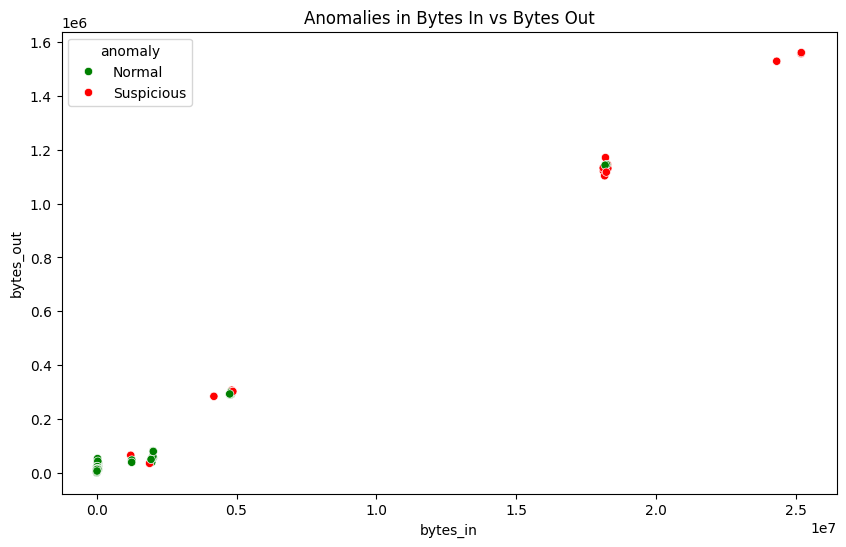

In [103]:
# 8. Visualization of Anomalies
# Visualize bytes_in vs bytes_out with anomalies highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bytes_in', y='bytes_out', hue='anomaly',
data=df, palette=['green', 'red'])
plt.title('Anomalies in Bytes In vs Bytes Out')
plt.show()